# **Week 3 Census Data Exploration**
### **Jia Ni**
In this assignment, I conduct a series of analyses on the 2023 race data for all census tracts in LA County: [ACS Demographic and Housing Estimates](https://data.census.gov/table/ACSDP5Y2023.DP05?g=050XX00US06037$1400000&moe=false). Due to RAM capacity limitations, I divided this assignment into four notebooks. In this specific notebook, I analyzed the population distribution of different racial groups in LA County using boxplots and histograms.

### **Import the libraries**

In [1]:
import pandas as pd
import geopandas as gpd

### **Read and add shapefile to notebook**

In [2]:
tracts = gpd.read_file('data/tl_2023_06037_faces.zip')
tracts.head()

,TFID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,BLOCKCE20,SUFFIX1CE,ZCTA5CE20,UACE20,PUMACE20,...,SLDLST,CSAFP,CBSAFP,METDIVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
0,219998894,06,037,980031,1,1040,None,90731,51445,03767,...,065,348,31080,31084,L,N,52687,+33.7356920,-118.2795003,"POLYGON ((-118.27998 33.7324, -118.27995 33.73..."
1,264647098,06,037,980031,1,1040,None,90731,51445,03767,...,065,348,31080,31084,L,N,27767,+33.7363236,-118.2791834,"POLYGON ((-118.2795 33.73248, -118.27923 33.73..."
2,219998897,06,037,297120,1,1007,None,90731,51445,03767,...,065,348,31080,31084,L,N,8592,+33.7301151,-118.2809352,"POLYGON ((-118.28139 33.73057, -118.28047 33.7..."
3,219998898,06,037,297120,1,1006,None,90731,51445,03767,...,065,348,31080,31084,L,N,20265,+33.7301205,-118.2824828,"POLYGON ((-118.28357 33.73058, -118.28139 33.7..."
4,219998899,06,037,297120,1,1005,None,90731,51445,03767,...,065,348,31080,31084,L,N,20253,+33.7301283,-118.2846552,"POLYGON ((-118.28574 33.73059, -118.28357 33.7..."


### **Datatype for each column**

In [3]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 143759 entries, 0 to 143758
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   TFID        143759 non-null  int64   
 1   STATEFP20   143759 non-null  object  
 2   COUNTYFP20  143759 non-null  object  
 3   TRACTCE20   143759 non-null  object  
 4   BLKGRPCE20  143759 non-null  object  
 5   BLOCKCE20   143759 non-null  object  
 6   SUFFIX1CE   582 non-null     object  
 7   ZCTA5CE20   141741 non-null  object  
 8   UACE20      121370 non-null  object  
 9   PUMACE20    143759 non-null  object  
 10  STATEFP     143759 non-null  object  
 11  COUNTYFP    143759 non-null  object  
 12  TRACTCE     143759 non-null  object  
 13  BLKGRPCE    143759 non-null  object  
 14  COUSUBFP    143759 non-null  object  
 15  SUBMCDFP    0 non-null       object  
 16  ESTATEFP    0 non-null       object  
 17  CONCTYFP    0 non-null       object  
 18  PLACEFP     1255

### **Create a new columns "FIPS" to generate unique identifiers for each census tract**

In [4]:
tracts['FIPS'] ='06' + '037' + tracts['TRACTCE20']

# Select only the "FIPS" and "geometry" columns from the DataFrame
tracts = tracts[['FIPS','geometry']]
tracts.head()

,FIPS,geometry
0,06037980031,"POLYGON ((-118.27998 33.7324, -118.27995 33.73..."
1,06037980031,"POLYGON ((-118.2795 33.73248, -118.27923 33.73..."
2,06037297120,"POLYGON ((-118.28139 33.73057, -118.28047 33.7..."
3,06037297120,"POLYGON ((-118.28357 33.73058, -118.28139 33.7..."
4,06037297120,"POLYGON ((-118.28574 33.73059, -118.28357 33.7..."


### **Merge geometries that share the same "FIPS"**

In [6]:
tracts_grouped = tracts.dissolve(by="FIPS").reset_index()
tracts_grouped.head()

,FIPS,geometry
0,06037006011,"POLYGON ((-118.86679 34.8031, -118.86716 34.80..."
1,06037101110,"POLYGON ((-118.29418 34.25595, -118.29434 34.2..."
2,06037101122,"POLYGON ((-118.29567 34.26321, -118.29602 34.2..."
3,06037101220,"POLYGON ((-118.2842 34.24792, -118.28592 34.24..."
4,06037101221,"POLYGON ((-118.28862 34.2523, -118.2898 34.252..."


In [7]:
# Detailed information
tracts_grouped.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      2500 non-null   object  
 1   geometry  2500 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 39.2+ KB


In [8]:
tracts_grouped.to_file("data/tracts_grouped.geojson", driver="GeoJSON")

In [7]:
# Read and add csv to the notebook
race = pd.read_csv('data/2023_race_cleaned.csv', encoding = 'utf8', dtype = {'FIPS': str})
race.head()

,GEO_ID,FIPS,NAME,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0047E,DP05_0055E,DP05_0060E,DP05_0061E,DP05_0037PE,DP05_0038PE,DP05_0039PE,DP05_0047PE,DP05_0055PE,DP05_0060PE,DP05_0061PE
0,1400000U,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,2367,146,4,292,5,558,780,57,3.5,0.1,7,0.1,13.4,18.8
1,1400000U,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,3047,25,24,544,0,277,281,72.6,0.6,0.6,13,0,6.6,6.7
2,1400000U,06037101220,Census Tract 1012.20; Los Angeles County; Cali...,1704,10,87,490,0,517,626,49.6,0.3,2.5,14.3,0,15.1,18.2
3,1400000U,06037101221,Census Tract 1012.21; Los Angeles County; Cali...,1835,150,27,390,0,805,724,46.7,3.8,0.7,9.9,0,20.5,18.4
4,1400000U,06037101222,Census Tract 1012.22; Los Angeles County; Cali...,1417,14,80,51,25,55,930,55.1,0.5,3.1,2,1,2.1,36.2


In [8]:
# Detailed information
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GEO_ID       2498 non-null   object
 1   FIPS         2498 non-null   object
 2   NAME         2498 non-null   object
 3   DP05_0037E   2498 non-null   int64 
 4   DP05_0038E   2498 non-null   int64 
 5   DP05_0039E   2498 non-null   int64 
 6   DP05_0047E   2498 non-null   int64 
 7   DP05_0055E   2498 non-null   int64 
 8   DP05_0060E   2498 non-null   int64 
 9   DP05_0061E   2498 non-null   int64 
 10  DP05_0037PE  2498 non-null   object
 11  DP05_0038PE  2498 non-null   object
 12  DP05_0039PE  2498 non-null   object
 13  DP05_0047PE  2498 non-null   object
 14  DP05_0055PE  2498 non-null   object
 15  DP05_0060PE  2498 non-null   object
 16  DP05_0061PE  2498 non-null   object
dtypes: int64(7), object(10)
memory usage: 331.9+ KB


### **Extract and rename the columns**

In [9]:
# Extract
columns_to_keep = ['FIPS',
                   'DP05_0037E',
                   'DP05_0038E',
                   'DP05_0039E',
                   'DP05_0047E',
                   'DP05_0055E',
                   'DP05_0060E',
                   'DP05_0061E',
                   'DP05_0037PE',
                   'DP05_0038PE',
                   'DP05_0039PE',
                   'DP05_0047PE',
                   'DP05_0055PE',
                   'DP05_0060PE',
                   'DP05_0061PE']
race = race[columns_to_keep]
race.head()

,FIPS,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0047E,DP05_0055E,DP05_0060E,DP05_0061E,DP05_0037PE,DP05_0038PE,DP05_0039PE,DP05_0047PE,DP05_0055PE,DP05_0060PE,DP05_0061PE
0,06037101110,2367,146,4,292,5,558,780,57,3.5,0.1,7,0.1,13.4,18.8
1,06037101122,3047,25,24,544,0,277,281,72.6,0.6,0.6,13,0,6.6,6.7
2,06037101220,1704,10,87,490,0,517,626,49.6,0.3,2.5,14.3,0,15.1,18.2
3,06037101221,1835,150,27,390,0,805,724,46.7,3.8,0.7,9.9,0,20.5,18.4
4,06037101222,1417,14,80,51,25,55,930,55.1,0.5,3.1,2,1,2.1,36.2


In [10]:
# Rename
race.columns = ['FIPS',
                'White',
                'Black or African American',
                'American Indian and Alaska Native',
                'Asian',
                'Native Hawaiian and Other Pacific Islander',
                'Some Other Race',
                'Two or More Races',
                'White_Percent',
                'Black or African American_Percent',
                'American Indian and Alaska Native_Percent',
                'Asian_Percent',
                'Native Hawaiian and Other Pacific Islander_Percent',
                'Some Other Race_Percent',
                'Two or More Races_Percent']

### **Identify and remove the mismatched FIPS**

In [11]:
# Identify
tracts_fips = set(tracts_grouped["FIPS"])
race_fips = set(race["FIPS"])
extra_fips = tracts_fips - race_fips
extra_fips

{'06037006011', '06037110606'}

In [12]:
# Remove
tracts_cleaned = tracts_grouped[~tracts_grouped["FIPS"].isin(extra_fips)]

# Output cleaned data
tracts_cleaned.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2498 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      2498 non-null   object  
 1   geometry  2498 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 58.5+ KB


### **Merge the two dataframes based on "FIPS"**

In [13]:
tracts_race=tracts_cleaned.merge(race,on="FIPS")
tracts_race.head()

,FIPS,geometry,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White_Percent,Black or African American_Percent,American Indian and Alaska Native_Percent,Asian_Percent,Native Hawaiian and Other Pacific Islander_Percent,Some Other Race_Percent,Two or More Races_Percent
0,06037101110,"POLYGON ((-118.29418 34.25595, -118.29434 34.2...",2367,146,4,292,5,558,780,57,3.5,0.1,7,0.1,13.4,18.8
1,06037101122,"POLYGON ((-118.29567 34.26321, -118.29602 34.2...",3047,25,24,544,0,277,281,72.6,0.6,0.6,13,0,6.6,6.7
2,06037101220,"POLYGON ((-118.2842 34.24792, -118.28592 34.24...",1704,10,87,490,0,517,626,49.6,0.3,2.5,14.3,0,15.1,18.2
3,06037101221,"POLYGON ((-118.28862 34.2523, -118.2898 34.252...",1835,150,27,390,0,805,724,46.7,3.8,0.7,9.9,0,20.5,18.4
4,06037101222,"POLYGON ((-118.28968 34.24908, -118.28983 34.2...",1417,14,80,51,25,55,930,55.1,0.5,3.1,2,1,2.1,36.2


### **Export the GeoDataFrame to a GeoJSON file**

In [14]:
tracts_race.to_file("data/tracts_race.geojson", driver="GeoJSON")

### **Import the library**

In [15]:
import matplotlib.pyplot as plt

### **Create a box plot of the population distribution by race**

In [16]:
race_columns = ["White", "Black or African American", "American Indian and Alaska Native", "Asian", "Native Hawaiian and Other Pacific Islander", "Some Other Race", "Two or More Races"]

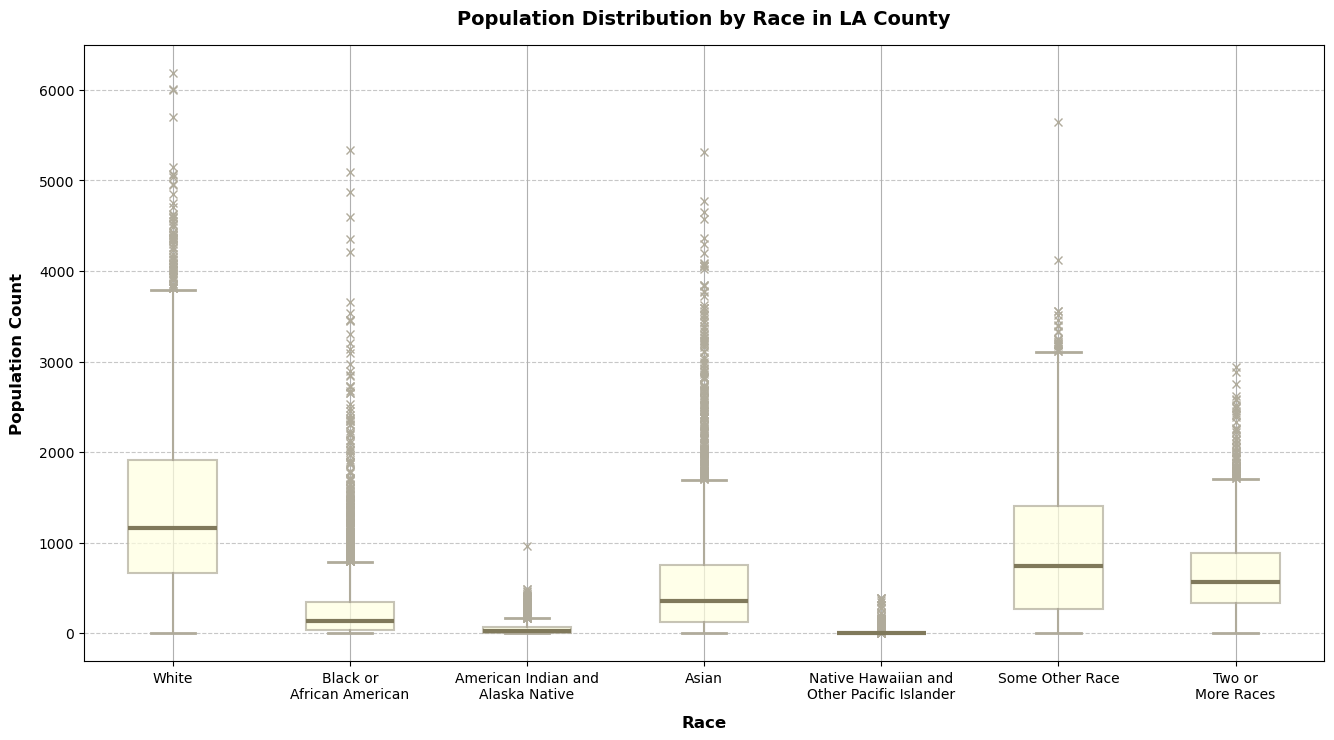

In [19]:
plt.figure(figsize = (16,8))
tracts_race[race_columns].boxplot(patch_artist = True,
                                  boxprops=dict(facecolor="lightyellow", color='#b0ab9b', linewidth=1.5, alpha = 0.7),
                                  medianprops = dict(color='#80795b', linewidth=3),
                                  whiskerprops = dict(color='#b0ab9b', linewidth=1.5),
                                  capprops = dict(color='#b0ab9b', linewidth=2),
                                  flierprops = dict(marker="x",  markeredgecolor='#b0ab9b', markersize=6))

plt.title("Population Distribution by Race in LA County", fontsize=14, fontweight='bold', pad = 15)
plt.ylabel("Population Count", fontsize=12, fontweight='bold', labelpad = 10)
plt.xlabel("Race", fontsize=12, fontweight='bold', labelpad = 10)
plt.yticks(fontsize = 10)
plt.xticks(ticks=range(1, len(race_columns) + 1),
           labels=["White", "Black or\nAfrican American", "American Indian and\nAlaska Native", "Asian", "Native Hawaiian and\nOther Pacific Islander", "Some Other Race", "Two or\nMore Races"],
          fontsize = 10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("population_distribution_by_race.png", dpi=300, bbox_inches="tight")

plt.show()

### **Create histograms of population distributions of different racial groups across census tracts**

/tmp/ipykernel_217/867156312.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


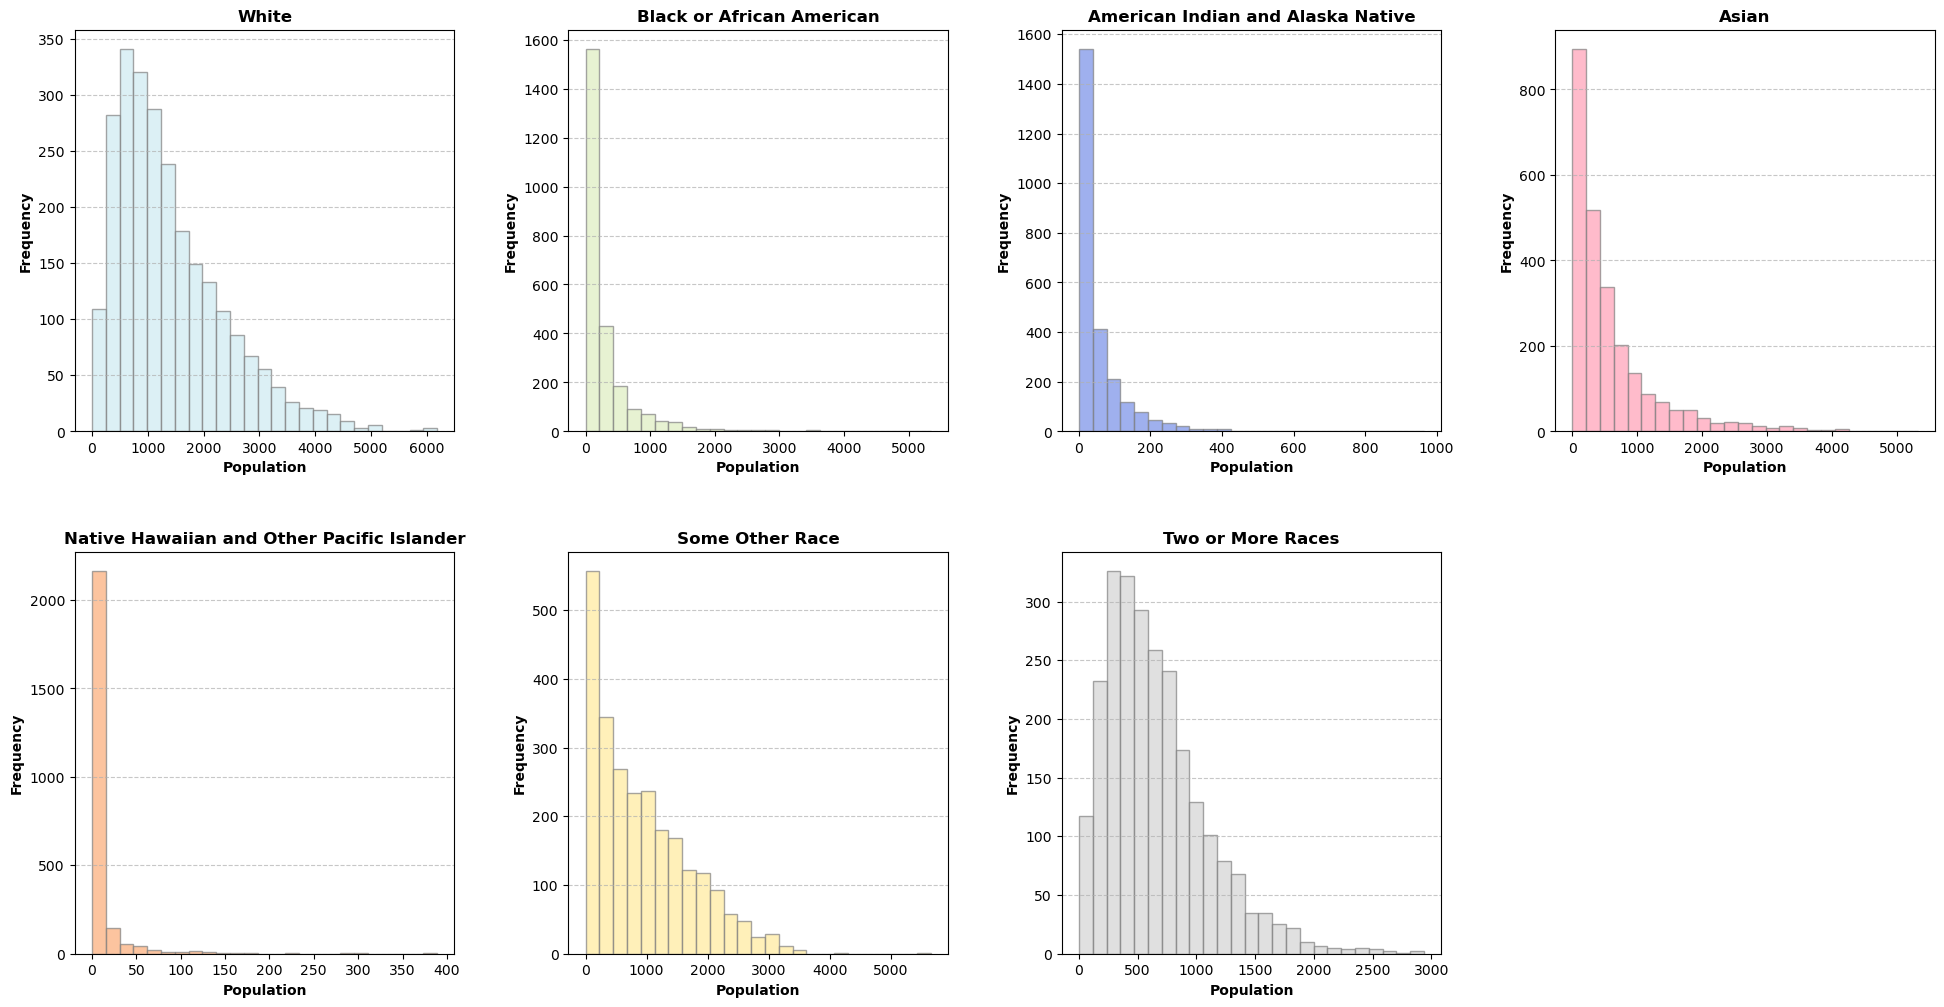

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
axes = axes.flatten()

colors = ['#ceebf2', '#deedc0', '#768fe8', '#ff9eb5', '#fcac77', '#ffeb9c', "lightgray"]

for i, (column, color) in enumerate(zip(race_columns, colors)):
    ax = axes[i]
    ax.hist(tracts_race[column], bins=25, color=color, edgecolor="gray", alpha=0.7)
    ax.set_title(column, fontsize=12, fontweight="bold")
    ax.set_xlabel("Population", fontsize=10, fontweight="bold")
    ax.set_ylabel("Frequency", fontsize=10, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

for j in range(len(race_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig("histograms_of_population_distributions_of_different_racial_groups.png", dpi=300, bbox_inches="tight")

plt.show()